In [1]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.constants import hbar, e
from scipy.fft import fft
from functools import lru_cache
from scipy.integrate import quad
import texpy as mz


from src import *

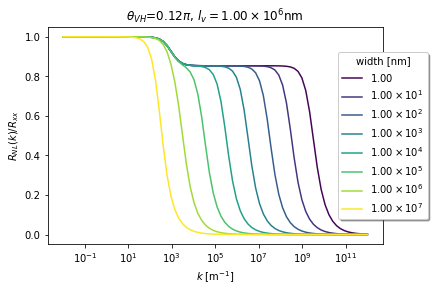

In [93]:
number_of_graphs=8
cmap=plt.get_cmap('viridis')
colors=cmap(np.linspace(1e-2,1,number_of_graphs))

widths=np.logspace(-9,-2,number_of_graphs,base=10)
#mu=np.linspace(delta,2*delta,number_of_graphs)

lv=1e-3
tan=np.tan(np.pi/8)
theta=np.arctan(tan)
for i in range(number_of_graphs):
    k= np.logspace(-2,12,80,base=10,dtype=np.double)
    R=[R_NLk(k,widths[i],lv,tan=tan) for k in k]
    plt.plot(k,R,color=colors[i],label=str(mz.ns(widths[i]*1e9)))


title_theta='$\\theta_{VH}$='+str(theta/np.pi)[:4]+'$\pi$'
title_lv='$l_v=$'+ str(mz.ns(lv*1e9))+'nm'

title=title_theta + ', ' + title_lv

#plt.yscale('log')
plt.xscale('log')
plt.xlabel('$k$ [m$^{-1}$]')
plt.ylabel('$R_{NL}(k)/R_{xx}$')
plt.title(title)
plt.legend(loc='right', bbox_to_anchor=(1.15,0.5), shadow=True,title='width [nm]')
#plt.xlim(0,500)

In [94]:
print(lv*np.sqrt(1+tan**2))
print(Lv(widths,lv,tan))

0.001082392200292394
[0.00091018 0.00091018 0.00091018 0.00091018 0.00091019 0.00091102
 0.00098978 0.00353212]


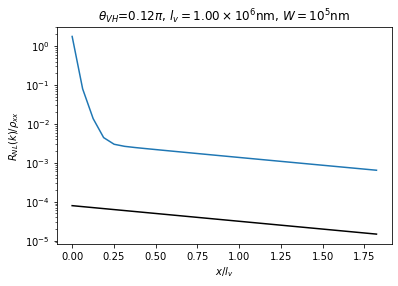

In [98]:
#x=np.array([(1/2+2**x)*np.pi for x in range(10)])
width=1e-4
limit=1e3/width

x=(np.arange(30)*200+1/2)*np.pi/limit

asd=[3,30,00]

args=(width,lv,tan)
X,Y=R_NLx(x,args,limit=limit)
plt.plot(X/lv,Y[:,0]*width)
    
xappr=np.linspace(0,X[-1],100)
#yappr=approx(xappr,Lv(width,lv,tan))*width
yappr=approxp(xappr,*args)#*10
plt.plot(xappr/lv,yappr,color='black')

plt.yscale('log')
plt.xlabel('$x/l_v$')
plt.ylabel('$R_{NL}(k)/\\rho_{xx}$')

title_width='$W=10^5$nm'
title=title_theta + ', ' + title_lv + ', ' + title_width

plt.title(title)
#plt.legend(loc='right', bbox_to_anchor=(1.15,0.5), shadow=True,title='width [nm]')

plt.savefig('R_NLx.png')

1125906.032173998

In [6]:
np.log2(1e11)

36.541209043760986